# Dissimilarity measures with Sequenzo

*3 March 2025, Yuqi Liang and Jan Meyerhoff-Liang*

Table of content
1. Compare dissimilarity measures based on CO₂ emissions data on the country level (1800 - 2022)
2. Analyze the execution time of different dissimilarity measures in R and Python based on big data

## 1. Get a rough idea of the data

In [6]:
# Import necessary libraries
from sequenzo import * # Social sequence analysis 
import pandas as pd # Data manipulation

# List all the available datasets in Sequenzo
print('Available datasets in Sequenzo: ', list_datasets())

# Load the data that we would like to explore in this tutorial
# `df` is the short for `dataframe`, which is a common variable name for a dataset
df = load_dataset('country_co2_emissions')

# Show the dataframe
df

Available datasets in Sequenzo:  ['chinese_colonial_territories', 'country_gdp_per_capita', 'country_co2_emissions']


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,High,High,High,High,High,High,High,High,High,High
1,Albania,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
2,Algeria,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
3,Andorra,High,High,High,High,High,High,High,High,High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
4,Angola,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,High,High,High,High,High,High,High,High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,High,Middle,High,High,High
190,Vietnam,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,High,High,High,High,High,Very High,Very High,Very High,Very High,Very High
191,Yemen,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,High,High,High,High,High,High,High,High,High,High
192,Zambia,High,High,High,High,High,High,High,High,High,...,High,High,High,High,High,High,High,High,High,High


The classification is based on all years' CO₂ per capita values:

* Very Low (Bottom 20%)
* Low (20-40%)
* Middle (40-60%)
* High (60-80%)
* Very High (Top 20%)

Using a jorgan in social sequence analysis, each category is called a **state**, and the sequence of states is called a social sequence. In sum, the dataset shows the level of the CO₂ emissions per capita of each country in each year. 

## 2. Analyze Social Sequences with Sequenzo

In [7]:
# Create a SequenceData object

# Define the time-span variable
time = list(df.columns)[1:]

states = ['Very Low', 'Low', 'Middle', 'High', 'Very High']

sequence_data = SequenceData(df, time=time, time_type="year", id_col="country", states=states)

sequence_data


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 194
[>] Min/Max sequence length: 223 / 223
[>] Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High']


SequenceData(194 sequences, Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High'])

## Visualization

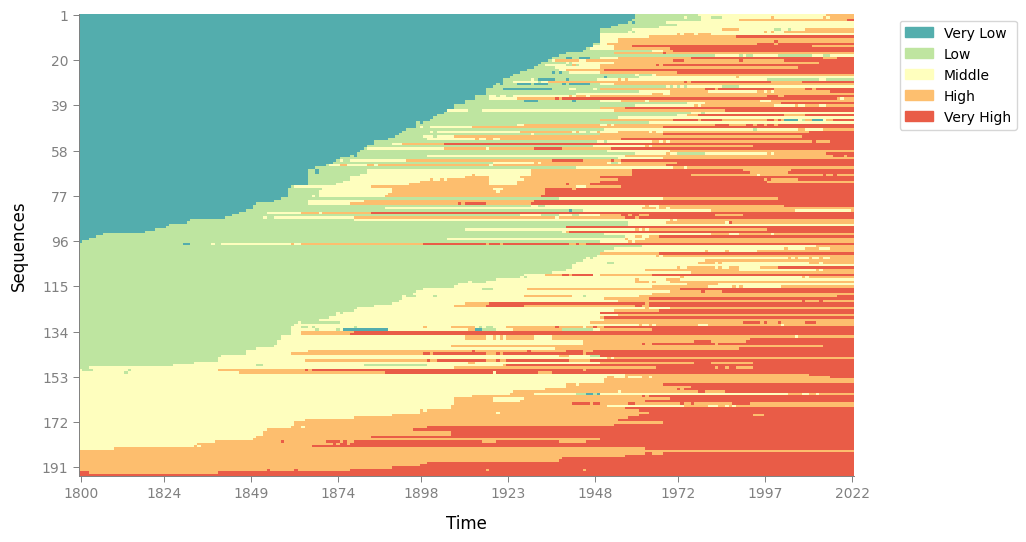

In [8]:
# Plot the index plot

plot_sequence_index(sequence_data, save_as='index_plot')

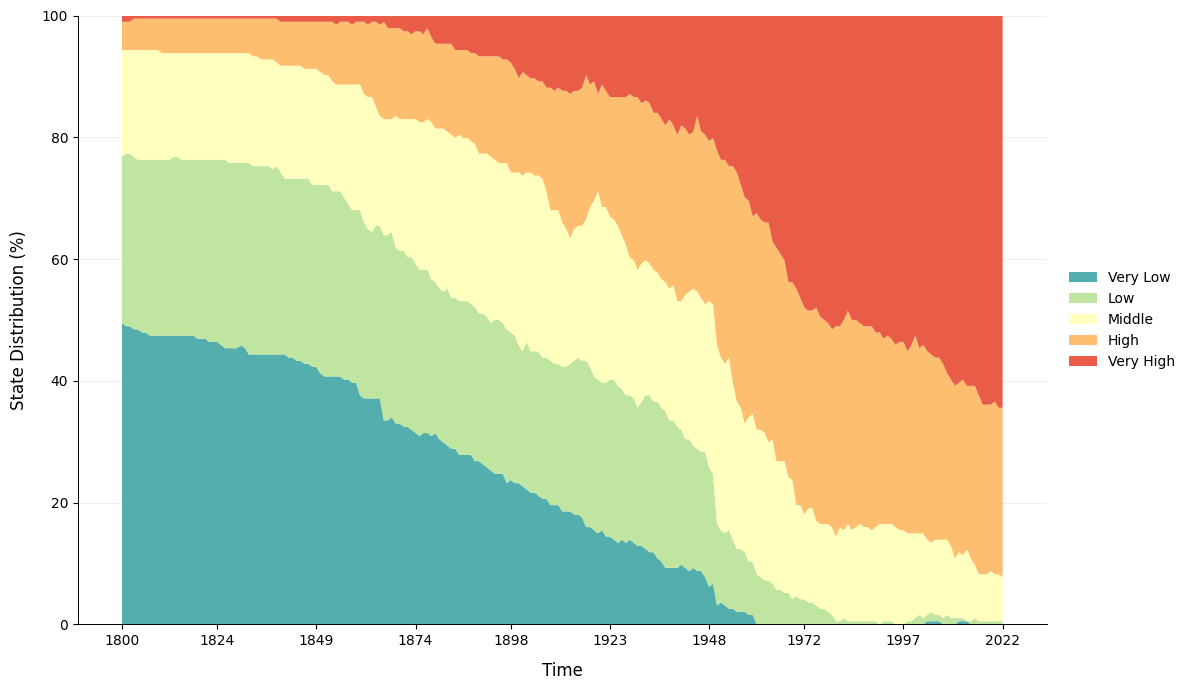

In [9]:
from sequenzo.visualization import plot_state_distribution

plot_state_distribution(sequence_data, save_as='state_distribution')

## Dissimilarity Measures

To better understand dissimialrity measures, we focus on some typical countries in our data.

In [10]:
compared_countries = ['USA', 'UK', 'China', 'Germany', 'India', 'Russia', 'Brazil', 'South Africa', 'Australia']

selected_countries_df = df[df['country'].isin(compared_countries)]

selected_countries_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
8,Australia,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
23,Brazil,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
35,China,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
64,Germany,Middle,Low,Low,Low,Middle,Middle,Middle,Middle,Middle,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
77,India,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,High,High,High,High,Very High,Very High,Very High,High,Very High,Very High
142,Russia,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
156,South Africa,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
182,UK,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
183,USA,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High


In [11]:
selected_sequence_data = SequenceData(selected_countries_df, time=time, time_type="year", id_col="country", states=states)


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 9
[>] Min/Max sequence length: 223 / 223
[>] Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High']


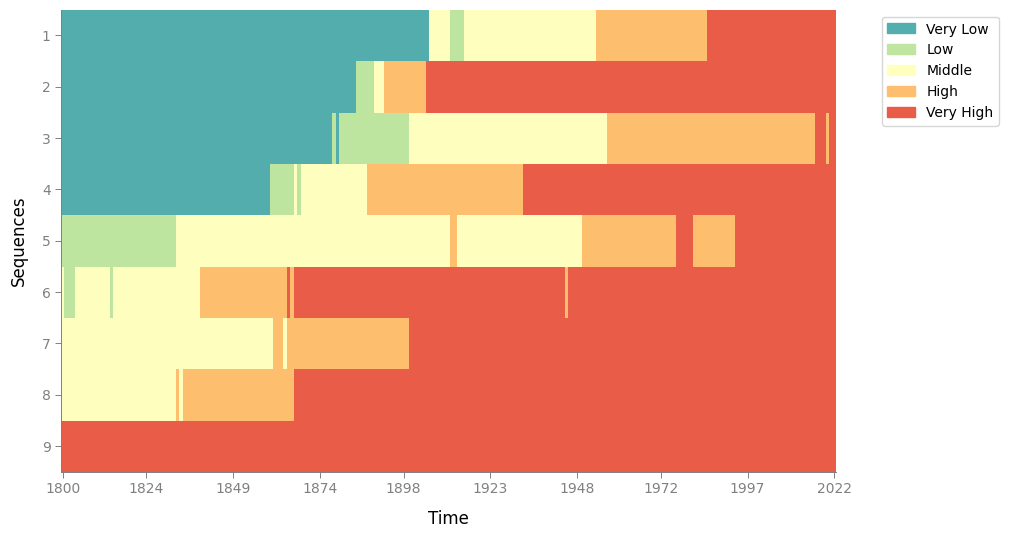

In [12]:
plot_sequence_index(save_as='index_plot_selected', seqdata=selected_sequence_data)

With country labels:

<img src="selected_index_plot_with_country_labels.png" alt="drawing" width="1200"/>

### Different dissimilarity measures, different distances among countries

We compare four different dissimilarity measures applied to CO₂ emission trajectories:

* **OM (indel=1, sm=CONSTANT):** 
    * A basic optimal matching method with fixed insertion/deletion and substitution costs, making it more sensitive to minor differences in sequence alignment.

* **OM (indel="auto", sm=TRATE):** 
    * An adaptive optimal matching method where insertion/deletion costs are automatically determined, and substitution costs adjust based on observed transition probabilities.

* **OMspell (indel=1, sm=CONSTANT):** 
    * A spell-based method that groups consecutive identical states into a single unit, reducing the influence of short-term fluctuations while using fixed insertion/deletion costs.

* **OMspell (indel="auto", sm=TRATE):** 
    * A spell-based method with adaptive insertion/deletion costs and substitution costs that adjust based on transition probabilities, making it effective for capturing long-term emission trends.


| **Method**                           | **Sensitivity** | **Impact**                                                                                                                                                   |
|--------------------------------------|---------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **OM (indel=1, sm=CONSTANT)**        | More sensitive to short-term emission fluctuations | May overestimate the importance of short-term changes, as it treats every state change equally without considering transition probabilities                  |
| **OM (indel="auto", sm=TRATE)**      | More sensitive to transition rate similarities | Captures similarities in how CO₂ emission categories evolve, making it useful for countries at different development stages with similar transition dynamics |
| **OMspell (indel=1, sm=CONSTANT)**   | More sensitive to long-term stability with occasional shifts | Better captures long-term similarities by treating consecutive identical states as a single unit, reducing noise from short-term fluctuations                |
| **OMspell (indel="auto", sm=TRATE)** | More sensitive to long-term stability with similar transition dynamics | Long-term stability + ccounts for both stable phases and transition rates                                                                                    |



In [31]:
om_indel_1_sm_2 = get_distance_matrix(seqdata=selected_sequence_data,
                                      method='OM',
                                      indel=1,
                                      sm="CONSTANT")

om_indel_1_sm_2

[>] Processing 9 sequences with 5 unique states.
  - Creating 5x5 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 9 unique sequences.
[>] Sequence length: min/max = 223 / 223.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Australia,Brazil,China,Germany,India,Russia,South Africa,UK,USA
Australia,0.0,148.0,220.0,52.0,246.0,150.0,180.0,124.0,56.0
Brazil,148.0,0.0,220.0,220.0,198.0,242.0,280.0,296.0,228.0
China,220.0,220.0,0.0,230.0,126.0,140.0,124.0,308.0,240.0
Germany,52.0,220.0,230.0,0.0,306.0,166.0,172.0,80.0,14.0
India,246.0,198.0,126.0,306.0,0.0,140.0,140.0,314.0,246.0
Russia,150.0,242.0,140.0,166.0,140.0,0.0,50.0,176.0,136.0
South Africa,180.0,280.0,124.0,172.0,140.0,50.0,0.0,186.0,180.0
UK,124.0,296.0,308.0,80.0,314.0,176.0,186.0,0.0,66.0
USA,56.0,228.0,240.0,14.0,246.0,136.0,180.0,66.0,0.0


In [32]:
om_indel_auto_sm_trate = get_distance_matrix(seqdata=selected_sequence_data,
                         method='OM',
                         indel="auto",
                         sm="TRATE"
                         )

om_indel_auto_sm_trate

[>] Processing 9 sequences with 5 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [Very Low, Low, Middle, High, Very High]
[>] Indel cost generated.

[>] Identified 9 unique sequences.
[>] Sequence length: min/max = 223 / 223.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Australia,Brazil,China,Germany,India,Russia,South Africa,UK,USA
Australia,0.000000,144.124205,219.487782,50.689572,245.490176,148.698384,179.249122,124.0,54.879154
Brazil,144.124205,0.000000,218.596267,218.684287,196.933971,239.419374,278.806910,296.0,226.679003
China,219.487782,218.596267,0.000000,229.802491,124.977479,138.849693,123.402189,308.0,239.599698
Germany,50.689572,218.684287,229.802491,0.000000,305.765103,165.286995,171.879521,80.0,13.919940
India,245.490176,196.933971,124.977479,305.765103,0.000000,138.361403,139.366910,314.0,245.079305
Russia,148.698384,239.419374,138.849693,165.286995,138.361403,0.000000,49.923636,176.0,135.042231
South Africa,179.249122,278.806910,123.402189,171.879521,139.366910,49.923636,0.000000,186.0,179.333970
UK,124.000000,296.000000,308.000000,80.000000,314.000000,176.000000,186.000000,0.0,66.000000
USA,54.879154,226.679003,239.599698,13.919940,245.079305,135.042231,179.333970,66.0,0.000000


In [33]:
om_spell_normal = get_distance_matrix(seqdata=selected_sequence_data,
                         method='OMspell',
                         indel=1,
                         sm="CONSTANT"
                         )

om_spell_normal

[>] Processing 9 sequences with 5 unique states.
  - Creating 5x5 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.
[>] Identified 9 unique spell sequences.
[>] Sequence spell length: min/max = 1 / 11.

[>] Starting Optimal Matching with spell(OMspell)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Australia,Brazil,China,Germany,India,Russia,South Africa,UK,USA
Australia,0.0,103.5,118.5,98.0,131.0,82.0,92.0,102.0,33.0
Brazil,103.5,0.0,127.0,126.5,115.5,141.5,175.5,196.5,132.5
China,118.5,127.0,0.0,130.5,69.5,72.5,82.5,188.5,123.5
Germany,98.0,126.5,130.5,0.0,167.0,97.0,129.0,148.0,98.0
India,131.0,115.5,69.5,167.0,0.0,91.0,123.0,223.0,158.0
Russia,82.0,141.5,72.5,97.0,91.0,0.0,54.0,136.0,85.0
South Africa,92.0,175.5,82.5,129.0,123.0,54.0,0.0,107.0,92.0
UK,102.0,196.5,188.5,148.0,223.0,136.0,107.0,0.0,69.0
USA,33.0,132.5,123.5,98.0,158.0,85.0,92.0,69.0,0.0


In [34]:
om_spell_trate = get_distance_matrix(seqdata=selected_sequence_data,
                         method='OMspell',
                         indel="auto",
                         sm="TRATE"
                         )

om_spell_trate

[>] Processing 9 sequences with 5 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [Very Low, Low, Middle, High, Very High]
[>] Indel cost generated.

[>] Identified 9 unique spell sequences.
[>] Sequence spell length: min/max = 1 / 11.

[>] Starting Optimal Matching with spell(OMspell)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Australia,Brazil,China,Germany,India,Russia,South Africa,UK,USA
Australia,0.0,103.500000,118.500000,98.000000,131.000000,82.00000,92.00000,102.0,33.0
Brazil,103.5,0.000000,126.974545,126.500000,115.500000,141.50000,175.50000,196.5,132.5
China,118.5,126.974545,0.000000,130.474545,69.382552,72.50000,82.50000,188.5,123.5
Germany,98.0,126.500000,130.474545,0.000000,166.882552,96.99697,128.99697,148.0,98.0
India,131.0,115.500000,69.382552,166.882552,0.000000,91.00000,123.00000,223.0,158.0
Russia,82.0,141.500000,72.500000,96.996970,91.000000,0.00000,54.00000,136.0,85.0
South Africa,92.0,175.500000,82.500000,128.996970,123.000000,54.00000,0.00000,107.0,92.0
UK,102.0,196.500000,188.500000,148.000000,223.000000,136.00000,107.00000,0.0,69.0
USA,33.0,132.500000,123.500000,98.000000,158.000000,85.00000,92.00000,69.0,0.0


### A more intuitive comparison of distances among countries

In [35]:
import pandas as pd
import itertools

# Extract unique country pairs
countries = list(om_indel_1_sm_2.index)
country_pairs = list(itertools.combinations(countries, 2))

# Create a dataframe to store distances from all methods
comparison_df_full = pd.DataFrame(columns=["Country_Pair", "OM_Constant", "OM_TRATE", "OMspell_Constant", "OMspell_TRATE"])

# Populate the dataframe
for c1, c2 in country_pairs:
    comparison_df_full = pd.concat([comparison_df_full, pd.DataFrame.from_records([{
        "Country_Pair": f"{c1}-{c2}",
        "OM_Constant": om_indel_1_sm_2.loc[c1, c2],
        "OM_TRATE": om_indel_auto_sm_trate.loc[c1, c2],
        "OMspell_Constant": om_spell_normal.loc[c1, c2],
        "OMspell_TRATE": om_spell_trate.loc[c1, c2]
    }])])

# Display the dataframe
comparison_df_full


/var/folders/kk/h5dw00r5357gxylmmb8zl7qw0000gn/T/ipykernel_17083/278304392.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df_full = pd.concat([comparison_df_full, pd.DataFrame.from_records([{


,Country_Pair,OM_Constant,OM_TRATE,OMspell_Constant,OMspell_TRATE
0,Australia-Brazil,148.0,144.124205,103.5,103.500000
0,Australia-China,220.0,219.487782,118.5,118.500000
0,Australia-Germany,52.0,50.689572,98.0,98.000000
0,Australia-India,246.0,245.490176,131.0,131.000000
0,Australia-Russia,150.0,148.698384,82.0,82.000000
0,Australia-South Africa,180.0,179.249122,92.0,92.000000
0,Australia-UK,124.0,124.000000,102.0,102.000000
0,Australia-USA,56.0,54.879154,33.0,33.000000
0,Brazil-China,220.0,218.596267,127.0,126.974545
0,Brazil-Germany,220.0,218.684287,126.5,126.500000


### Key Findings on Specific Country Pairs

<img src="selected_index_plot_with_country_labels.png" alt="drawing" width="1200"/>

### **1. Germany - USA**

<img src="germany_usa_index_plot.png" alt="drawing" width="900"/>

- **OM_Constant = 14.0**, **OMspell_Constant = 98.0**
- **OM_TRATE = 13.91**, **OMspell_TRATE = 98.0**

The OM method produces a very low dissimilarity score, indicating that Germany and the USA have highly similar CO₂ emission trajectories.

However, the OMspell method yields a much higher distance, suggesting that while their short-term fluctuation patterns are similar, OMspell identifies distinct long-term stable states between Germany and the USA that are not captured by traditional OM methods.

The TRATE method results in slightly lower distances than the CONSTANT method, implying that their transition rates are relatively aligned, suggesting their emission shifts occur at similar time intervals.

### **2. Russia - South Africa**

<img src="index_plot_russia_south_africa.png" alt="drawing" width="900"/>

- **OM_Constant = 50.0**, **OMspell_Constant = 54.0**
- **OM_TRATE = 49.92**, **OMspell_TRATE = 54.0**

The distances computed by both OM and OMspell methods are very similar, indicating that Russia and South Africa exhibit comparable CO₂ emission patterns both in the short and long term.

The negligible difference between the TRATE and CONSTANT methods suggests that both countries exhibit stable emission category shifts over time, leading to minimal differences across OM variants.

### **3. China - India**

<img src="index_plot_china_india.png" alt="drawing" width="900"/>

- **OM_Constant = 126.0**, **OMspell_Constant = 69.5**
- **OM_TRATE = 124.98**, **OMspell_TRATE = 69.38**

The OM method results in significantly higher distances compared to OMspell, indicating that China and India have undergone similar long-term emission patterns, making them appear more alike in spell-based analysis.

The TRATE method results in slightly lower distances than CONSTANT, suggesting that China and India have comparable transition rates in their CO₂ emission categories, confirming that their transition rates are synchronized over time.

## **Takeaway**

These findings highlight the importance of selecting the appropriate dissimilarity measure based on the analytical focus.

- **OM methods** are more reactive to short-term fluctuations, while **OMspell** emphasizes stable emission trends by reducing the impact of temporary variations.
- **TRATE-based approaches** refine transition-based comparisons by aligning shifts in emission categories over time, offering deeper insights into structural changes.


## Execution time comparison based on big data: R vs Python

### Data sources
Yuqi's PhD paper: LinkedIn data on computer science graduates in India and the US, with more than 370,000 individuals and 5 time points. To test the differences of the performances of R and Python, I draw upon random samples of the data to create datasets of different sizes.

### Takeaway

Previously, we tested the relative frequency plot and observed that when handling more than 2,500 sequences, R struggled to generate the plot efficiently. Now, we are evaluating the performance of dissimilarity measures in R and Python.

In the current Sequenzo beta version, the scalability ceiling is significantly higher than in R, meaning it performs better with large datasets. However, for smaller datasets, there is still room for optimization.

**Main Reason:** Interactions between Python and C++ can be more efficient

Every call from Python to C++ adds some latency, which is negligible for large datasets but noticeable in small datasets. 

Thus, we are working on reducing the number of calls between Python and C++ by batch-processing multiple sequences at once instead of calling the function for each sequence individually.


### 

### OM

<img src="r_vs_python/seqdist_OM_runtime_vs_datasize.jpg" alt="drawing" width="1200"/>

### OMspell

<img src="r_vs_python/seqdist_OMspell_runtime_vs_datasize.jpg" alt="drawing" width="1200"/>

### Hamming Distance

<img src="r_vs_python/seqdist_HAM_runtime_vs_datasize.jpg" alt="drawing" width="1200"/>

### Dynamic Hamming Distance
<img src="r_vs_python/seqdist_DHD_runtime_vs_datasize.jpg" alt="drawing" width="1200"/>

In [37]:
print("Thank you for learning sequence analysis with Sequenzo! ")
print("We hope you found this tutorial insightful.")
print("\n💡 Stay Curious, keep coding, and discover new insights.")
print("✉️ If you have any questions, please feel free to reach out :)")

Thank you for learning sequence analysis with Sequenzo! 
We hope you found this tutorial insightful.

💡 Stay Curious, keep coding, and discover new insights.
✉️ If you have any questions, please feel free to reach out :)
